# $\color{black}{}$
### 6. Choosing Hyperparameters
---

After the exercise in the last chapter, you're hopefully thinking "why am I spending my time trying different values of `n_neighbors`, can't it do this automatically?" If so, you're in luck!

It is a very common thing to need to try out a bunch of different values for your hyperparameters and so scikit-learn provides us with some tools to help out.

<AxesSubplot:xlabel='x1', ylabel='x2'>

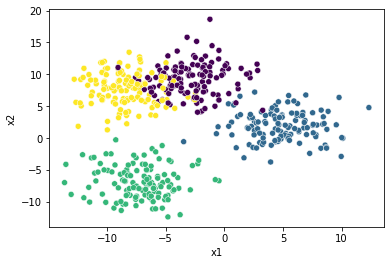

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=500, centers=4, cluster_std=2.5, random_state=42)
X = pd.DataFrame(X, columns=['x1', 'x2'])

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
sns.scatterplot(data=X, x='x1', y='x2', c=y)

The tools that allows us to do the hyper-parameter searching is called `GridSearchCV` which will rerun the model training for every possible hyperparameter that we pass it.

The `GridSearchCV` constructor takes two things:

   1. The model that we want to explore
   2. A dictionary containing the hyper-parameter values we want to test

In this case, we are asking it to try every value of `n_neighbors` from 1 to 49 and it will use the training data to choose the best value.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    'n_neighbors': range(1, 51)
}
model = GridSearchCV(KNeighborsClassifier(), parameters)
model.fit(train_X, train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)})

The best way to visualise the data is to plot it. We can do this by grabbing the `cv_results_` attribute of `GridSearchCV` and plotting the `mean_test_score` against the value of `n_neighbors`. `GridSearchCV` will run each experiment multiple times with different splits of training and validation data to provide some measure of uncertainty of the score.

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

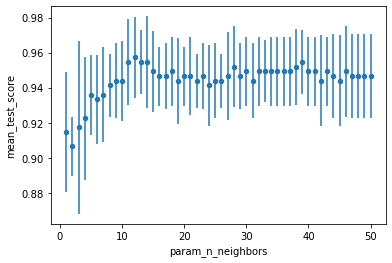

In [10]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results
cv_results.plot.scatter(x='param_n_neighbors', y='mean_test_score', yerr='std_test_score')

One thing that `GridSearchCV` does, once it has scanned through all the parameters, is do a final fit using the whole training data set using the best hyperparameters from the search. This allows you to use the `GridSearchCV` object `clf` as if it were a `KNeighborsClassifier` object.

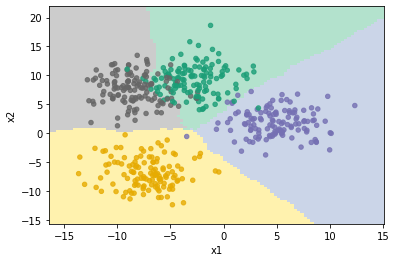

In [18]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)
    
    if ax is None:
        fig, ax = plt.subplots()
    
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap='Pastel2', alpha=1.0, shading='auto')
    X.plot.scatter(0, 1, c=y, colormap='Dark2', colorbar=False, alpha=0.8, ax=ax)

plot_knn(model, X, y)

In [19]:
model.score(test_X, test_y)

0.904

Using something like `GridSearchCV` allows you to find the best hyperparameters for your models while keeping them working most generally.